In [1]:
cd ..

/Users/pierre/PycharmProjects/spec2vec_mlops


In [11]:
from typing import Dict, List
from urllib.request import urlopen

from pathlib import Path
import json
import ijson
import seaborn as sns
import logging

from spec2vec_mlops import config
from spec2vec_mlops.helper_classes.data_loader import DataLoader

KEYS = config["gnps_json"]["necessary_keys"]

## Download ALL_GNPS.json and save in */test/assets*

In [ ]:
# # Download
# uri = "https://gnps-external.ucsd.edu/gnpslibrary/ALL_GNPS.json"

# dl = DataLoader()
# results = dl.load_gnps_json(uri)

# # Save in assets
# base = Path('spec2vec_mlops/test/assets')
# jsonpath = base / ("ALL_GNPS.json")
# base.mkdir(exist_ok=True)
# jsonpath.write_text(json.dumps(results))

INFO:spec2vec_mlops.helper_classes.data_loader:Loading data from <http.client.HTTPResponse object at 0x7f9c5c7b0e20>... This might take a while.


## Load ALL_GNPS.json from /test/assets

In [3]:
f = open ('spec2vec_mlops/test/assets/ALL_GNPS.json', "r")
results = json.loads(f.read())

## Assess Distribution of Precursor_MZ

In [6]:
all_precursor_mz = [float(spectrum['Precursor_MZ']) for spectrum in results]

In [12]:
logging.getLogger('matplotlib.font_manager').disabled = True

In [16]:
import scipy.stats
import numpy as np
print(scipy.stats.describe(all_precursor_mz))
print(np.std(all_precursor_mz))

DescribeResult(nobs=439977, minmax=(0.0, 3355.6), mean=476.2971291428871, variance=58497.92598314893, skewness=0.9474345437094656, kurtosis=1.1198738599132074)
241.8631700494458


<AxesSubplot:ylabel='Count'>

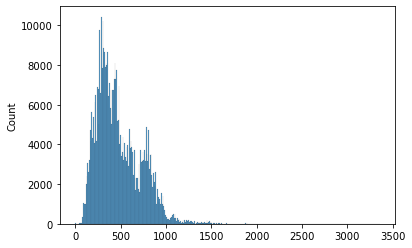

In [13]:
sns.histplot(all_precursor_mz)

___

## Assess missing Precursor_MZ

In [4]:
counter_precursor_key = 0
counter_precursor_key = sum([1 for spectrum in results if 'Precursor_MZ' in spectrum.keys()])

In [5]:
print(f"{(counter_precursor_key/len(results))*100}% of spectra have the 'Precursor_MZ' key")

100.0% of spectra have the 'Precursor_MZ' key


In [6]:
counter_precursor_key_not_null = 0
counter_precursor_key_not_null = sum([1 for spectrum in results  if 'Precursor_MZ' in spectrum.keys() and spectrum['Precursor_MZ'] != ''])

In [7]:
print(f"{(counter_precursor_key_not_null/len(results))*100}% \
of spectra 'Precursor_MZ' keys are not null")

100.0% of spectra 'Precursor_MZ' keys are not null
